# Chapter 4: ODEs - Friction Spring
Example code from Chapter 4

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def FrictionSpring(state, time):
    """Spring with friction acting to oppose motion"""
    x = state[0]
    v = state[1]
    return array([v,-k/m*x - mu*g*sign(v)])

In [6]:
def rk2 (y , time , dt , derivs ) :
    """
    This function moves the value of 'y' forward by a single
    step of size 'dt', using a second-order Runge-Kutta
    algorithm. This particular algorithm is equivalent to
    f i n d i n g the average of the s l o p e at t ime t and at t ime
    ( t+dt ) , and using t h a t average s l o p e to f i n d the new
    value of y .
    """
    k0 = dt*derivs(y , time )
    k1 = dt*derivs( y + k0 , time + dt )
    ynext = y + 0.5*( k0 + k1 )
    return ynext

In [7]:
def euler(y, t, dt, derivs):
    """A routine that implements Euler ’s method of finding the new ’state’ 
    of y, given the current state, time, and desired time step . ’ derivs ’ 
    must be a function that returns the derivatives of y and thus defines 
    the differential equation."""    
    y_next = y + derivs(y,t) * dt 
    return y_next

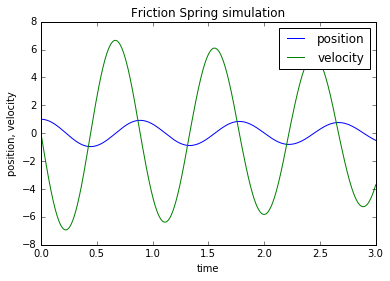

In [12]:
# Use RK2 to calculate position in friction spring
N = 1000
k = 50
mu = 0.1
m = 1
g = 9.8
xo = 1
vo = 0.0
tau = 3.0
dt = tau/float(N-1)

# Since we’re plotting vs t , we need time for that plot.

time = linspace(0, tau, N)

y = zeros([N,2]) # the state vector
y[0,0] = xo
y[0,1] = vo


for j in range(N-1):
    y[j+1] = rk2(y[j], time[j], dt, FrictionSpring)


xdata = y[:,0]
vdata = y[:,1]
plot(time, xdata, label="position")
plot(time, vdata, label="velocity")
title('Friction Spring simulation')
xlabel ("time")
ylabel("position, velocity")
legend()
